# Лабораторная работа №5
# Рекурсия. Фракталы.

## Выполнил студент группы БВТ2002 Мосева Алеся Сергеевна
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

In [1]:
import turtle as t
t.TurtleScreen._RUNNING = True

### Список фракталов:

Кривая Коха
| Кривая Гильберта
| Кривая Серпинского
| Салфетка Серпинского
| Ковер Серпинского
| Дерево Пифагора 

### Выполнение:

#### Кривая Коха

In [2]:
def koh_curve(size, n):
    if n == 0:
        t.forward(size)
    else:
        koh_curve(size / 3, n - 1)
        t.left(60)
        koh_curve(size / 3, n - 1)
        t.right(120)
        koh_curve(size / 3, n - 1)
        t.left(60)
        koh_curve(size / 3, n - 1)
    
size = 300
t.speed(300)
koh_curve(size, 4)
t.done()

Terminator: 

#### Кривая Гильберта

In [3]:
def hilbert(n, angle, side):
    if n == 0:
        return
    
    t.right(angle)
    hilbert(n-1, -angle, side)
  
    t.forward(side)
    t.left(angle)
    hilbert(n-1, angle, side)
  
    t.forward(side)
    hilbert(n-1, angle, side)
  
    t.left(angle)
    t.forward(side)
    hilbert(n-1, -angle, side)
    t.right(angle)
angle = 90
n = 3
t.speed(10)
hilbert(n, angle, 10)
t.done()
    

Terminator: 

#### Кривая Серпинского

In [4]:
def draw_segment(n, side):
    if n == 0:
        return
    draw_segment(n - 1, side)
    t.left(45)
    t.forward(side)
    t.left(45)
    draw_segment(n - 1, side)
    t.right(90)
    t.forward(side)
    t.right(90)
    draw_segment(n - 1, side)
    t.left(45)
    t.forward(side)
    t.left(45)
    draw_segment(n - 1, side)

def sierpinski(n, side):
    draw_segment(n, side)
    t.left(45)
    t.forward(side)
    t.left(45)

    draw_segment(n, side)
    t.left(45)
    t.forward(side)
    t.left(45)

    draw_segment(n, side)
    t.left(45)
    t.forward(side)
    t.left(45)

    draw_segment(n, side)
    t.left(45)
    t.forward(side)
    t.left(45)

sierpinski(1, 10)
t.speed(10)
t.done()



#### Салфетка Серпинского

In [20]:
def sierpinski2(n, side):
    if n == 0:
        t.stamp()
    else:    
        for i in range(3):
            t.forward(side)
            sierpinski2(n - 1, side / 2)
            t.backward(side)
            t.left(120)
t.penup()
t.hideturtle()
t.shape('triangle')
t.right(30)
sierpinski2(3, 100)
t.done()

#### Ковер Серпинского

In [50]:
def sierpinski_carpet(n, side):
    if n == 0: 
        t.color('black')
        t.begin_fill()
        for i in range(4):
            t.forward(side)
            t.left(90)
        t.end_fill()
    else:
        for i in range(4):
            sierpinski_carpet(n - 1, side / 3)
            t.forward(side / 3)
 
            sierpinski_carpet(n - 1, side / 3)
            t.forward(side / 3)
 
            t.forward(side / 3)
            t.left(90)

t.hideturtle()
t.speed(1000000)
sierpinski_carpet(2, 100)
t.done()

#### Дерево Пифагора

In [48]:
def pifagor_tree(i, n, side):
    if i == n:
        return
    t.forward(side)
    t.left(60)
    pifagor_tree(i + 1, n, side / i)
    t.right(120)
    pifagor_tree(i + 1, n, side / i)
    t.left(60)
    t.backward(side)
t.left(90)
pifagor_tree(1, 6, 100)
t.done()


#### Оценка времени выполнения фрактала в зависимости от глубины

In [64]:
import pandas as pd
import time

In [65]:
first = []
start_time = time.time()
koh_curve(100, 1)
first.append(time.time() - start_time)

start_time = time.time()
koh_curve(100, 2)
first.append(time.time() - start_time)

start_time = time.time()
koh_curve(100, 3)
first.append(time.time() - start_time)

In [67]:
second = []
start_time = time.time()
hilbert(1, 90, 100)
second.append(time.time() - start_time)

start_time = time.time()
hilbert(2, 90, 100)
second.append(time.time() - start_time)

start_time = time.time()
hilbert(3, 90, 100)
second.append(time.time() - start_time)


In [72]:
third = []
start_time = time.time()
sierpinski(2, 10)
third.append(time.time() - start_time)

start_time = time.time()
sierpinski(3, 10)
third.append(time.time() - start_time)



In [76]:
start_time = time.time()
sierpinski(1, 10)
third.insert(0, time.time() - start_time)

In [78]:
fourth = []
start_time = time.time()
sierpinski2(1, 100)
fourth.append(time.time() - start_time)

start_time = time.time()
sierpinski2(2, 100)
fourth.append(time.time() - start_time)

start_time = time.time()
sierpinski2(3, 100)
fourth.append(time.time() - start_time)



In [80]:
fifth = []
start_time = time.time()
sierpinski_carpet(1, 100)
fifth.append(time.time() - start_time)

start_time = time.time()
sierpinski_carpet(2, 100)
fifth.append(time.time() - start_time)

start_time = time.time()
sierpinski_carpet(3, 100)
fifth.append(time.time() - start_time)

In [85]:
sixth = []
start_time = time.time()
pifagor_tree(1, 1, 100)
sixth.append(time.time() - start_time)

start_time = time.time()
pifagor_tree(1, 2, 100)
sixth.append(time.time() - start_time)

start_time = time.time()
pifagor_tree(1, 3, 100)
sixth.append(time.time() - start_time)

start_time = time.time()
pifagor_tree(1, 4, 100)
sixth.append(time.time() - start_time)

start_time = time.time()
pifagor_tree(1, 5, 100)
sixth.append(time.time() - start_time)

start_time = time.time()
pifagor_tree(1, 6, 100)
sixth.append(time.time() - start_time)

In [87]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Вывод

[6.640380144119263, 46.59566807746887]


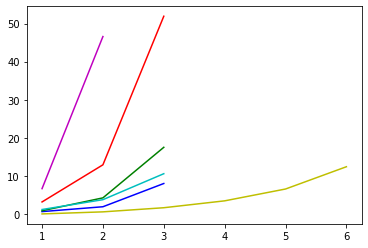

In [96]:
x = [1, 2, 3]
x2 = [1, 2]
x1 = [1, 2, 3, 4, 5, 6]
f1 = fifth[0:2]
print(f1)
fig = plt.figure()
plt.plot(x, first, 'b') #Кривая Коха - синий
plt.plot(x, second, 'g') #Кривая Гильберта - зеленый
plt.plot(x, third, 'r') #Кривая Серпинского - красный
plt.plot(x, fourth, 'c') #Салфетка Серпинского - голубой
plt.plot(x2, f1, 'm') #Ковер Серпинского - фиолетовый
plt.plot(x1, sixth, 'y') #Дерево Пифагора - желтый

